<a href="https://colab.research.google.com/github/Nancy4Hany/SHAI-task/blob/master/Copy_of_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

#**Task1: Basic Data Exploration**#

In [4]:
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 116479
Number of columns: 13


In [5]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 1
TotalPayBenefits         1
Year                     1
Notes               116479
Agency                   1
Status              116479
dtype: int64


In [7]:
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
                 Id        BasePay    OvertimePay       OtherPay  \
count  116479.00000  115874.000000  116479.000000  116479.000000   
mean    58240.00000   69711.777605    5552.186954    4049.761005   
std     33624.73534   44304.895794   12366.738794    8645.226043   
min         1.00000    -166.010000      -0.010000   -7058.590000   
25%     29120.50000   38138.595000       0.000000       0.000000   
50%     58240.00000   66624.240000       0.000000     945.840000   
75%     87359.50000  100736.977500    5165.330000    4832.735000   
max    116479.00000  319275.010000  245131.880000  400184.250000   

           Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  80320.000000  116478.000000     116478.000000  116478.000000    0.0   
mean   26589.464793   78951.203789      97286.561318    2012.114537    NaN   
std    15704.939751   52805.115553      65358.466062       0.907971    NaN   
min      -33.890000       0.000000 

In [8]:
print("\nUnique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].unique())


Unique values in categorical columns:

EmployeeName:
['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Meaghan M Mcmilton'
 'Stephanie L Mcknight' 'Robert Harris Iii']

JobTitle:
['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Lieutenant (Police Department)' 'Deputy Sheriff (SFERS)'
 'Undersheriff (SFERS)']

Agency:
['San Francisco' nan]


In [9]:
column_of_interest = 'Year'
print(f"\nDistribution of values in '{column_of_interest}':")
print(df[column_of_interest].value_counts())


Distribution of values in 'Year':
2013.0    37606
2012.0    36766
2011.0    36159
2014.0     5947
Name: Year, dtype: int64


In [10]:
highest_paid_employees = df[df['TotalPay'] == df['TotalPay'].max()]
print("\nEmployees with the highest total pay:")
print(highest_paid_employees[['EmployeeName', 'TotalPay']])


Employees with the highest total pay:
     EmployeeName   TotalPay
0  NATHANIEL FORD  567595.43


In [11]:
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                        Id   BasePay  OvertimePay  OtherPay  Benefits  \
Id                1.000000 -0.096627    -0.018409 -0.037786 -0.296349   
BasePay          -0.096627  1.000000     0.263227  0.293580  0.918347   
OvertimePay      -0.018409  0.263227     1.000000  0.322189  0.290880   
OtherPay         -0.037786  0.293580     0.322189  1.000000  0.241160   
Benefits         -0.296349  0.918347     0.290880  0.241160  1.000000   
TotalPay         -0.100840  0.951320     0.510190  0.482766  0.880021   
TotalPayBenefits  0.035513  0.941996     0.473658  0.437638  0.926237   
Year              0.947356  0.210378     0.122206  0.092652  0.146809   
Notes                  NaN       NaN          NaN       NaN       NaN   
Status                 NaN       NaN          NaN       NaN       NaN   

                  TotalPay  TotalPayBenefits      Year  Notes  Status  
Id               -0.100840          0.035513  0.947356    NaN     NaN  
BasePay           0.951320     

<ipython-input-11-248659e80400>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


#**Task2: Descriptive Statistics**#

In [13]:
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
mean_salary = df[salary_columns].mean()
print("\nMean salary for each column:")
print(mean_salary)


Mean salary for each column:
BasePay             69711.777605
OvertimePay          5552.186954
OtherPay             4049.761005
TotalPay            78951.203789
TotalPayBenefits    97286.561318
dtype: float64


In [14]:
median_salary = df[salary_columns].median()
print("\nMedian salary for each column:")
print(median_salary)


Median salary for each column:
BasePay             66624.240
OvertimePay             0.000
OtherPay              945.840
TotalPay            73800.100
TotalPayBenefits    93326.915
dtype: float64


In [15]:
mode_salary = df[salary_columns].mode().iloc[0]
print("\nMode salary for each column:")
print(mode_salary)


Mode salary for each column:
BasePay                0.00
OvertimePay            0.00
OtherPay               0.00
TotalPay               0.00
TotalPayBenefits    7959.18
Name: 0, dtype: float64


In [16]:
min_salary = df[salary_columns].min()
print("\nMinimum salary for each column:")
print(min_salary)


Minimum salary for each column:
BasePay             -166.01
OvertimePay           -0.01
OtherPay           -7058.59
TotalPay               0.00
TotalPayBenefits     -33.89
dtype: float64


In [17]:
max_salary = df[salary_columns].max()
print("\nMaximum salary for each column:")
print(max_salary)


Maximum salary for each column:
BasePay             319275.01
OvertimePay         245131.88
OtherPay            400184.25
TotalPay            567595.43
TotalPayBenefits    567595.43
dtype: float64


In [18]:
salary_range = max_salary - min_salary
print("\nRange of salaries for each column:")
print(salary_range)


Range of salaries for each column:
BasePay             319441.02
OvertimePay         245131.89
OtherPay            407242.84
TotalPay            567595.43
TotalPayBenefits    567629.32
dtype: float64


In [19]:
std_dev_salary = df[salary_columns].std()
print("\nStandard deviation of salaries for each column:")
print(std_dev_salary)


Standard deviation of salaries for each column:
BasePay             44304.895794
OvertimePay         12366.738794
OtherPay             8645.226043
TotalPay            52805.115553
TotalPayBenefits    65358.466062
dtype: float64


#**Task3: Data Cleaning**#

In [20]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 1
TotalPayBenefits         1
Year                     1
Notes               116479
Agency                   1
Status              116479
dtype: int64


In [24]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               116479
Agency                   0
Status              116479
dtype: int64


#**Task4: Data Visualization**#

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set(style="whitegrid")

<Figure size 1200x800 with 0 Axes>

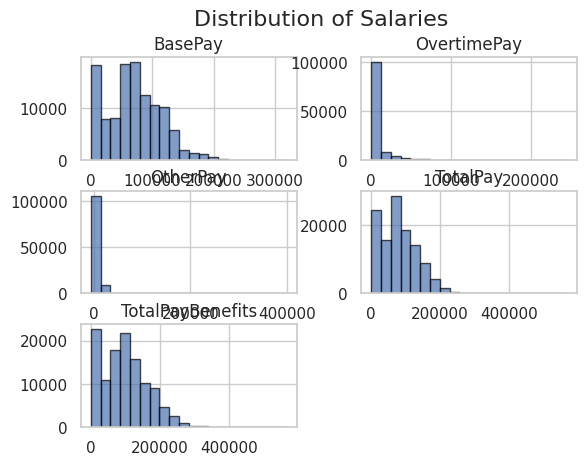

In [30]:
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
plt.figure(figsize=(12, 8))
df[salary_columns].hist(bins=20, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Salaries', fontsize=16)
plt.show()

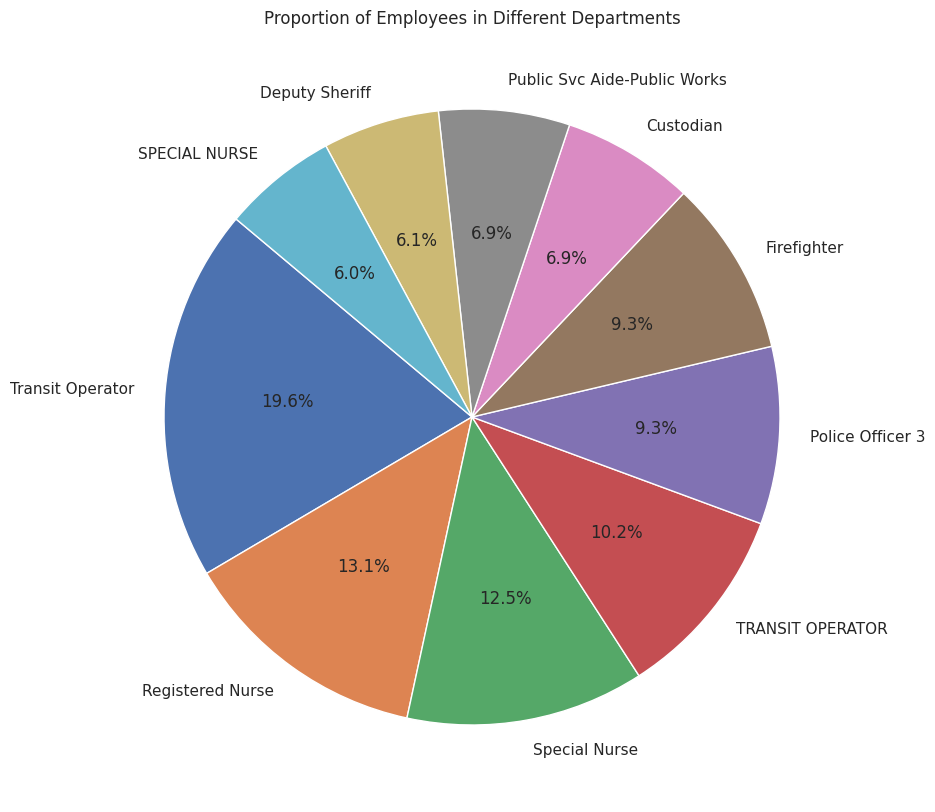

In [31]:
plt.figure(figsize=(10, 10))
department_counts = df['JobTitle'].value_counts().head(10)
labels = department_counts.index
plt.pie(department_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()

#**Task5: Grouped analysis**




In [32]:
average_salaries_by_job = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
print("\nTop 10 Job Titles with the Highest Average Salaries:")
print(average_salaries_by_job.head(10))


Top 10 Job Titles with the Highest Average Salaries:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


In [34]:
average_salaries_by_year_job = df.groupby(['Year', 'JobTitle'])['TotalPay'].mean().reset_index()

In [35]:
for year in average_salaries_by_year_job['Year'].unique():
    print(f"\nTop 10 Job Titles with the Highest Average Salaries in {year}:")
    top_10_job_titles = average_salaries_by_year_job[average_salaries_by_year_job['Year'] == year] \
        .sort_values(by='TotalPay', ascending=False).head(10)
    print(top_10_job_titles[['JobTitle', 'TotalPay']])
    print("=" * 50)


Top 10 Job Titles with the Highest Average Salaries in 2011.0:
                                           JobTitle       TotalPay
395  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  399211.275000
290                  DEPUTY DIRECTOR OF INVESTMENTS  307899.460000
172          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  302377.730000
280    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  279359.560000
362                     EXECUTIVE CONTRACT EMPLOYEE  277438.840000
173                                 CHIEF OF POLICE  267992.590000
9                ADMINISTRATOR, SFGH MEDICAL CENTER  257124.440000
279            DEPUTY CHIEF III (POLICE DEPARTMENT)  250026.488000
278                               DEPARTMENT HEAD V  233834.037143
679                                   PORT DIRECTOR  233357.280000

Top 10 Job Titles with the Highest Average Salaries in 2012.0:
                          JobTitle       TotalPay
1231               Chief of Police  321552.110000
1232        Chief, Fire Department 

#**Task6: Simple Correlation Analysis**

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
correlation_coefficient = df['TotalPay'].corr(df['BasePay'])
print(f"\nCorrelation between 'TotalPay' and 'BasePay': {correlation_coefficient:.2f}")


Correlation between 'TotalPay' and 'BasePay': 0.95


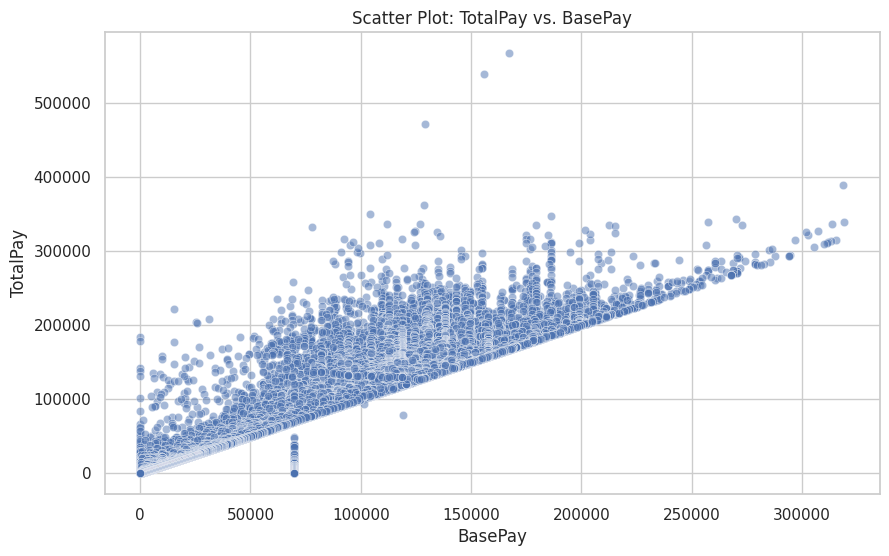

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
plt.title('Scatter Plot: TotalPay vs. BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

#**Task7: summary of insights**

# Basic Data Exploration:
- The dataset contains information about employees, including their job titles, salaries, and other details.
- It has columns such as 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year', etc.

# Descriptive Statistics:
- Calculated basic statistics such as mean, median, mode, minimum, maximum salary, range of salaries, and standard deviation.
- Provided insights into the central tendency and variability of salary-related columns.

# Data Cleaning:
- Imputed missing values using appropriate methods (mean for numeric columns, mode for categorical columns).
- Ensured the dataset is ready for analysis without missing values.

# Basic Data Visualization:
- Created histograms to visualize the distribution of salaries, providing insights into the spread of salary data.
- Used a pie chart to represent the proportion of employees in different departments, offering a quick overview of departmental composition.

# Grouped Analysis:
- Grouped the data by job titles and calculated average salaries, identifying the top job titles with the highest average salaries.
- Extended the analysis to group by both year and job title, providing insights into how average salaries vary across different years for specific job titles.

# Simple Correlation Analysis:
- Explored the correlation between 'TotalPay' (salary) and 'BasePay', calculated the correlation coefficient, and visualized the relationship using a scatter plot.


# Good Luck!